<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Supervised learning quality measures</center></h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Isolines
Let's take a look ant ROC dimention.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border:none;}
.tg td{font-family:Arial, sans-serif;font-size:20px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:20px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e" colspan="2" rowspan="2"><br></th>
    <th class="tg-s6z2" colspan="2">Prediction</th>
  </tr>
  <tr>
    <td class="tg-s6z2">+</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-031e" rowspan="2">True class</td>
    <td class="tg-s6z2">+</td>
    <td class="tg-s6z2">TP<br></td>
    <td class="tg-baqh">FN</td>
    <td class="tg-baqh">Pos</td>
  </tr>
  <tr>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">FP<br></td>
    <td class="tg-baqh">TN</td>
    <td class="tg-baqh">Neg</td>    
  </tr>
  <tr>
    <td class="tg-yw4l"></td>
    <td class="tg-baqh"></td>
  </tr>
</table>

* $TP$ (true positive) 
* $FP$ (false positive)
* $FN$ (false negative)
* $TN$ (true negative) 
* $TPR = \frac{TP}{TP + FN}=\frac{TP}{Pos}$
* $FPR = \frac{FP}{FP + TN} = \frac{FP}{Neg}$

#### Task

Write down the expression of accuracy as a function of TPR and FPR
* $ \text{accuracy} = \frac{TP + TN}{Pos+Neg} = \dots $

#### Task

Plot isolines for `rn = [0.2, 0.5, 0.7]` and `accuracy` in `linspace(0.1,1,0.1)` (each  `rn` has a new figure)

Check ourselves
* The greater `rn` the more extreme the slope of the line
* The higher line corresponds to greater `accuracy`

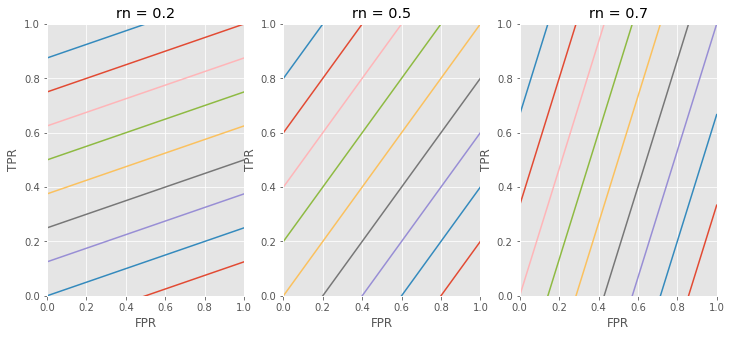

In [7]:
fig, ax = plt.subplots(1,3)

for i, rn in enumerate([0.2, 0.5, 0.7]):
    rp = 1 - rn
    for a in np.arange(0.1, 1, 0.1):

        fpr = np.linspace(0,1,10)
        tpr = (a - rn)/rp + (rn/rp)*fpr
        
        ax[i].plot(fpr, tpr)
        ax[i].set_xlim(0,1)
        ax[i].set_ylim(0,1)
        
    ax[i].set_title('rn = %.1f' % rn)
    ax[i].set_xlabel('FPR')
    ax[i].set_ylabel('TPR')

Consider the following example:

`alg1` and `alg2` have the following $FPR$ и $TPR$:

* `alg1: 0.6, 0.8375`
* `alg2: 0.4, 0.72`

Plot isoline for `accuracy = 0.75` assuming that `rn=20%`

* `alg1` is better than `alg2` (in terms of `accuracy`) as it lies on the isoline which is above 
* any algorithm on that line is better than `alg2` (in terms of `accuracy`)
* any algorithm that lies on isoline above `alg1` is better (in terms of `accuracy`)

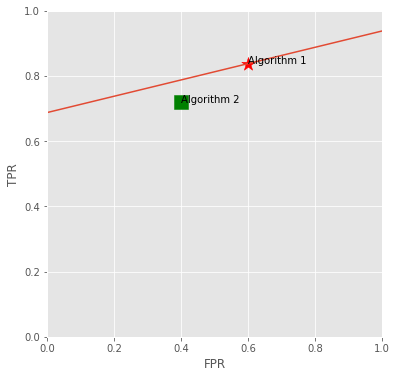

In [8]:
plt.figure(figsize=(6,6))

rn = 0.2 # Доля отрицательного класса
rp = 1-rn

a = 0.75

alg1 = (0.6, 0.8375)
alg2 = (0.4, 0.72)

plt.scatter(alg1[0], alg1[1], color='r', marker='*', s=200)
plt.text(alg1[0], alg1[1], 'Algorithm 1', )

plt.scatter(alg2[0], alg2[1], color='g', marker='s', s=200)
plt.text(alg2[0], alg2[1], 'Algorithm 2', )

fpr = np.linspace(0,1,10)
tpr = (a - rn)/rp + (rn/rp)*fpr

plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

#### Task

Find `rn` s.t. `alg2` would be better than `alg1`

In [ ]:
## Your Code Here

# Client responce task

We are going to consider a dataset from [old data analysis competition](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29):

```
Один из способов повышения эффективности взаимодействия банка с клиентами заключается в том, чтобы отправлять предложение о новой услуге не всем клиентам банка, а только некоторой части, выбираемой по принципу наибольшей склонности к отклику на данное предложение.

Конкурсное задание заключается в том, чтобы предложить алгоритм, который будет выдавать оценку склонности клиента к положительному отклику по его признаковому описанию. 
Эта оценка может (хотя и не обязана) интерпретироваться как вероятность положительного отклика. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем клиентам, у которых значение оценки выше некоторого порога. 

Целевая мера качества - ROC-AUC
```

In [9]:
RND_SEED = 1234

## Load dataset

Column description: `descr.txt`.

In [13]:
!head data/descr.txt

PREVIOUS_CARD_NUM_UTILIZED	���������� ��� ��������������� ���� ( ���� ����� - 0) 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight

In [11]:
df = pd.read_excel('data/data_train_complete.xlsx')
df_true_test = pd.read_excel('data/data_test_complete.xlsx')

## Preprocessing

Now we are going to run simple preprocessing, that is:

* Drop "hard" features `['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']`

In [17]:
def preproc(df_input):
    
    drop_cols = ['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 
                 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 
                 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 
                 'AGREEMENT_RK']
    
    df_temp = df_input.copy()
    df_temp = df_temp.drop(drop_cols, axis=1)
    df_temp = df_temp.fillna(-9999)
    df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'] = df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'].fillna(0.0)
    
    return df_temp

In [18]:
df_preproc = df.pipe(preproc)
df_true_test_preproc = df_true_test.pipe(preproc)

In [20]:
label_col = df_preproc.columns == 'TARGET'
X, y = df_preproc.loc[:, ~label_col].values, df_preproc.loc[:, label_col].values.flatten()
X_true_test, y_true_test = df_true_test_preproc.loc[:, ~label_col].values, df_true_test_preproc.loc[:, label_col].values.flatten()

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

## Cross-validation and quality measures

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import LogisticRegression

In [65]:
model = Pipeline([
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l2', C=1.0, class_weight='balanced'))
])

All quality measures can be found in `metrics` submodule

In [66]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

Now let's recall cross-validation

In [67]:
y_hat = model.predict(X_valid)
y_hat_proba = model.predict_proba(X_valid)

(array([   90.,   326.,   401.,   721.,  1073.,  1002.,   581.,   246.,
           73.,     8.]),
 array([ 0.        ,  0.09951577,  0.19903153,  0.2985473 ,  0.39806306,
         0.49757883,  0.59709459,  0.69661036,  0.79612612,  0.89564189,
         0.99515765]),
 <a list of 10 Patch objects>)

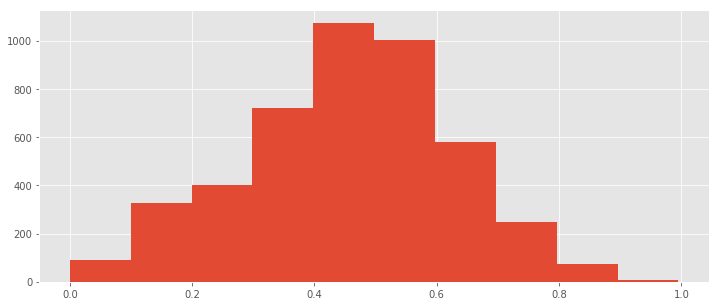

In [68]:
plt.hist(y_hat_proba[:,1])

In [69]:
y_hat_proba

array([[ 0.70060293,  0.29939707],
       [ 0.56507936,  0.43492064],
       [ 0.49828768,  0.50171232],
       ..., 
       [ 0.50402379,  0.49597621],
       [ 0.52535684,  0.47464316],
       [ 0.21767958,  0.78232042]])

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [71]:
fpr, tpr, thresh = roc_curve(y_valid, y_hat_proba[:, 1])

In [72]:
fpr.shape

(880,)

In [73]:
tpr.shape

(880,)

In [74]:
thresh.shape

(880,)

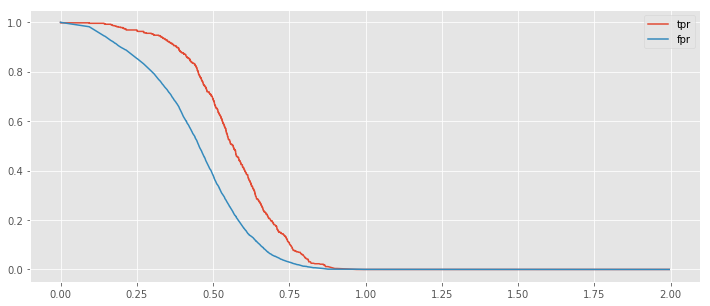

In [75]:
plt.plot(thresh, tpr, label='tpr')
plt.plot(thresh, fpr, label='fpr')
plt.legend()

In [76]:
roc_auc_score(y_valid, y_hat_proba[:, 1])

0.70554245998388088

In [77]:
auc(fpr, tpr)

0.70554245998388088

Text(0,0.5,u'TPR')

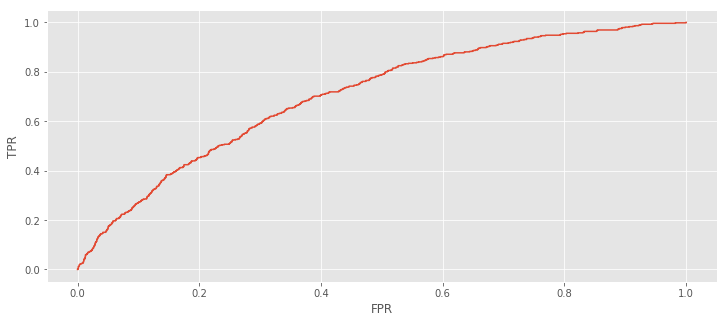

In [78]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [79]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [80]:
pr, rec, _ = precision_recall_curve(y_valid, y_hat_proba[:, 1])

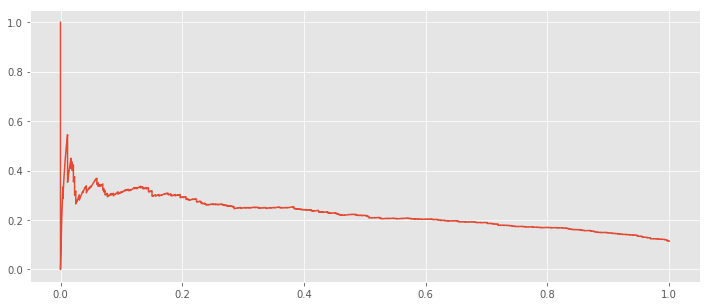

In [81]:
plt.plot(rec, pr)

In [82]:
recall_score(y_valid, y_hat)

0.68978805394990361

In [83]:
precision_score(y_valid, y_hat)

0.18951826363155108

In [84]:
f1_score(y_valid, y_hat)

0.29734219269102985

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_valid, y_hat, labels=[1,0])

array([[ 358,  161],
       [1531, 2471]])

In [87]:
print(classification_report(y_valid, y_hat))

             precision    recall  f1-score   support

          0       0.94      0.62      0.74      4002
          1       0.19      0.69      0.30       519

avg / total       0.85      0.63      0.69      4521



## Unbalanced domain

We may recognize that our classification domain in quite unbalanced

In [56]:
y.mean()

0.11720979624344594

Let's explore some options

* Build-in balancing in models
* Some sampling techniques in [imblearn module](http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/index.html)

In [57]:
# !pip install imbalanced-learn

In [111]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.pipeline import Pipeline as Pipeline_imb

In [112]:
model = Pipeline_imb([
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('balancer', ClusterCentroids()),
    ('clf', LogisticRegression(penalty='l2', C=1.0, class_weight=None))
])

In [113]:
model.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('balancer', ClusterCentroids(estimator=None, n_jobs=1, random_state=None, ratio='auto')), ('clf', LogisticRegression(C=1.0, class_w...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [114]:
y_hat = model.predict(X_valid)
y_hat_proba = model.predict_proba(X_valid)

(array([ 138.,  254.,  306.,  362.,  357.,  474.,  604.,  821.,  829.,  376.]),
 array([ 0.        ,  0.08811369,  0.17622738,  0.26434107,  0.35245476,
         0.44056845,  0.52868214,  0.61679583,  0.70490952,  0.79302321,
         0.88113689]),
 <a list of 10 Patch objects>)

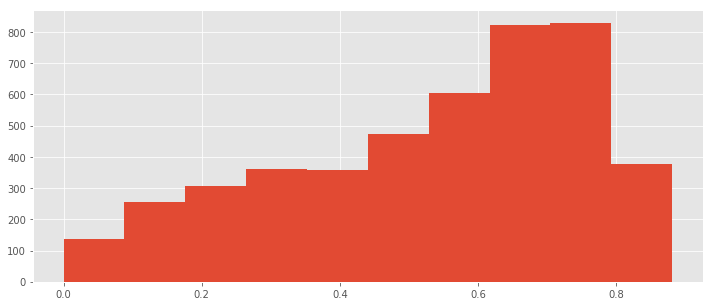

In [115]:
plt.hist(y_hat_proba[:, 1])

In [116]:
fpr, tpr, thresh = roc_curve(y_valid, y_hat_proba[:, 1])

In [117]:
fpr.shape

(896,)

In [118]:
tpr.shape

(896,)

In [119]:
thresh.shape

(896,)

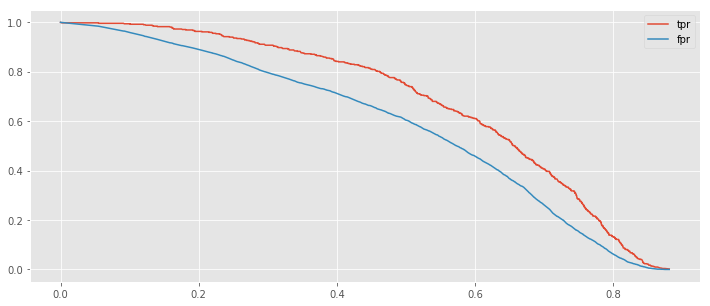

In [120]:
plt.plot(thresh, tpr, label='tpr')
plt.plot(thresh, fpr, label='fpr')
plt.legend()

In [121]:
roc_auc_score(y_valid, y_hat_proba[:, 1])

0.61520444016912545

In [122]:
auc(fpr, tpr)

0.61520444016912545

Text(0,0.5,u'TPR')

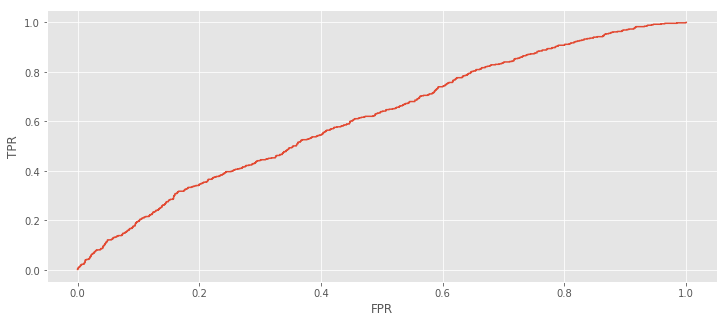

In [123]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [124]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [125]:
pr, rec, _ = precision_recall_curve(y_valid, y_hat_proba[:, 1])

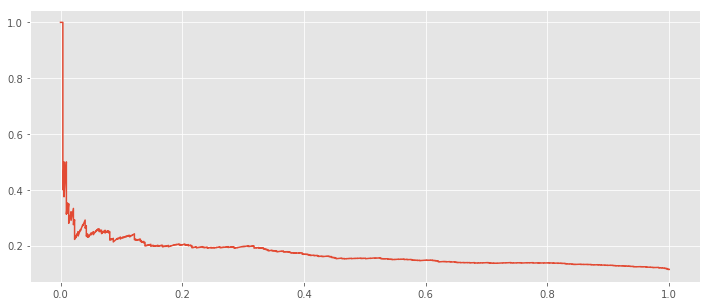

In [126]:
plt.plot(rec, pr)

In [127]:
recall_score(y_valid, y_hat)

0.74759152215799618

In [128]:
precision_score(y_valid, y_hat)

0.13822586391164945

In [129]:
f1_score(y_valid, y_hat)

0.23331328923631992

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_valid, y_hat, labels=[1,0])

array([[ 388,  131],
       [2419, 1583]])

In [132]:
print(classification_report(y_valid, y_hat))

             precision    recall  f1-score   support

          0       0.92      0.40      0.55      4002
          1       0.14      0.75      0.23       519

avg / total       0.83      0.44      0.52      4521



In [134]:
scores = []
for thresh in np.linspace(0, 1, 20):
    scores.append(f1_score(y_valid, y_hat_proba[:, 1]>thresh))

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


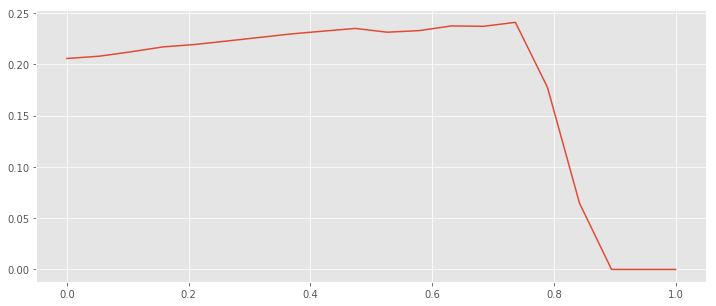

In [137]:
thresh = np.linspace(0, 1, 20)
plt.plot(thresh, scores)